In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [34]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

C:\Users\Mohammed\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [35]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

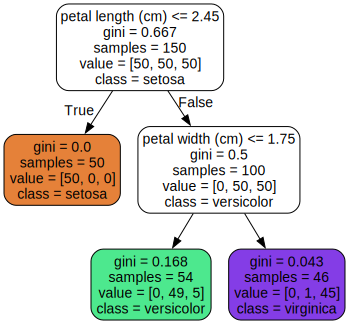

In [38]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

In [39]:
from sklearn.datasets import load_breast_cancer,fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
breast_cancer_data=load_breast_cancer(as_frame=True)['data']
cols=breast_cancer_data.columns
X=breast_cancer_data.values
y=load_breast_cancer(as_frame=True)['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
breast_cancer_data.head()

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42,)
tree_clf.fit(X_train, y_train)
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "breast_tree.dot"),  # path differs in the book
        feature_names=cols,
        class_names=load_breast_cancer(as_frame=True)['target_names'],
        rounded=True,
        filled=True
    )
from graphviz import Source

Source.from_file(IMAGES_PATH / "breast_tree.dot")  # path differs in the book

In [ ]:
breast_cancer_data.columns

In [ ]:
y_hat=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
print(confusion_matrix(y_test,y_hat))

# Criterion==> Entropy

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy',,max_depth=3, random_state=42,)
tree_clf.fit(X_train, y_train)
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "breast_tree.dot"),  # path differs in the book
        feature_names=cols,
        class_names=load_breast_cancer(as_frame=True)['target_names'],
        rounded=True,
        filled=True
    )
from graphviz import Source

Source.from_file(IMAGES_PATH / "breast_tree.dot")  # path differs in the book

In [ ]:
y_hat=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing(as_frame=True)['data']
cols=housing.columns
X=housing.values
y=fetch_california_housing(as_frame=True)['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [42]:
import pandas as pd
df=pd.read_csv("air_quality_health_impact_data.csv")

In [43]:
df.drop(columns=['RecordID'],inplace=True)
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [44]:
y=df['HealthImpactClass'].values
X=df[df.columns[:-1]].values

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
sm = SMOTE(random_state=42)

In [5]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [50]:
X_res, y_res=sm.fit_resample(X,y)

In [51]:
from collections import Counter

In [52]:
Counter(y)

Counter({0.0: 4808, 1.0: 579, 3.0: 95, 2.0: 273, 4.0: 56})

In [53]:
Counter(y_res)
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [67]:
cls=DecisionTreeClassifier(max_depth=20)

In [68]:
cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [69]:
y_hat=cls.predict(X_test)

In [70]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85      1208
         1.0       0.94      0.94      0.94      1220
         2.0       0.92      0.93      0.92      1176
         3.0       0.93      0.94      0.94      1223
         4.0       0.89      0.97      0.93      1183

    accuracy                           0.92      6010
   macro avg       0.92      0.92      0.92      6010
weighted avg       0.92      0.92      0.92      6010



<Axes: >

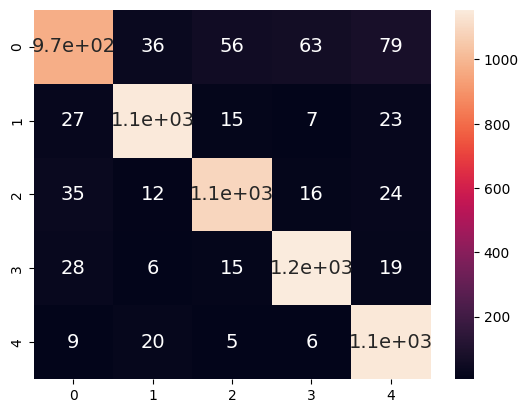

In [74]:
import seaborn as sb
sb.heatmap(confusion_matrix(y_test,y_hat),annot=True)